In [437]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC 
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [338]:
X = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_features.csv', index_col='respondent_id')
y = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_labels.csv', index_col='respondent_id')
test_set = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/test_set_features.csv', index_col='respondent_id')

In [339]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [340]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

Text(0, 0.5, 'h1n1_vaccine')

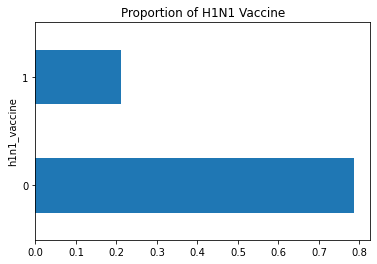

In [341]:
fig, ax = plt.subplots(sharex=True)

n_obs = y.shape[0]

(y['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax)
)
ax.set_ylabel("h1n1_vaccine")

In [342]:
y = pd.Series(y['h1n1_vaccine'])

In [343]:
y.shape

(26707,)

In [344]:
y.value_counts(normalize=True)

0   0.79
1   0.21
Name: h1n1_vaccine, dtype: float64

In [345]:
y

respondent_id
0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [346]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [347]:
X.shape

(26707, 35)

In [348]:
X.drop(columns=['hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'health_insurance', 'doctor_recc_seasonal', ], inplace=True)

In [349]:
X.shape

(26707, 26)

In [350]:
X.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,24547.00,25736.00,25887.00,25903.00,26316.00,26319.00,26312.00,26458.00,26458.00
mean,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,0.22,0.28,0.08,0.11,3.85,2.34,2.36,0.89,0.53
std,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,0.41,0.45,0.28,0.32,1.01,1.29,1.36,0.75,0.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00
50%,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,4.00,2.00,2.00,1.00,0.00
75%,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,5.00,4.00,4.00,1.00,1.00
max,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,3.00,3.00


In [351]:
X.isna().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
household_adults                249
household_children              249
dtype: int64

In [352]:
X.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,24547.00,25736.00,25887.00,25903.00,26316.00,26319.00,26312.00,26458.00,26458.00
mean,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,0.22,0.28,0.08,0.11,3.85,2.34,2.36,0.89,0.53
std,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,0.41,0.45,0.28,0.32,1.01,1.29,1.36,0.75,0.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00
50%,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,4.00,2.00,2.00,1.00,0.00
75%,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,5.00,4.00,4.00,1.00,1.00
max,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,3.00,3.00


In [353]:
y.shape

(26707,)

Baseline Model

In [354]:

num_cols = X.select_dtypes('number').columns

ord_cols = ['age_group', 'education',  'income_poverty', 'employment_status']

cat_cols = ['race', 'sex', 'marital_status', 'rent_or_own'] 


cat_cols

['race', 'sex', 'marital_status', 'rent_or_own']

In [355]:
num_cols

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [385]:
# code taken from https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, num_cols), 
        ('cat', cat_transformer, cat_cols)], remainder = "drop")

#estimators = LogisticRegression(penalty="l2", C=1)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
("classifier", LogisticRegression(penalty="l2", C=1))])

pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', '...
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')),
                                                 ('cat',
                                 

In [386]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', '...
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'sex',
                                                   'marital_status',
                                                   'rent_or_own'])])),
                ('classifier', LogisticRegression(C=1))])

In [357]:
#pipe = Pipeline(steps=[ 
    ("col_transfer", preprocessor), 
    ('estimators', estimators)
])




In [387]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', '...
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'sex',
                                                   'marital_status',
                                                   'rent_or_own'])])),
                ('classifier', LogisticRegression(C=1))])

In [359]:
X_train, X_true, y_train, y_true = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

In [388]:
pipeline.fit(X_train, y_train)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', '...
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'sex',
                                                   'marital_status',
                                                   'rent_or_own'])])),
                ('classifier', LogisticRegression(C=1))])

In [361]:
#clf = Pipeline(steps=[('preprocessing', preprocessor), 
                    ('classifier', Grid])


In [402]:
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standard_scaler',
                                                     StandardScaler()),
                                                    ('simple_imputer',
                                                     SimpleImputer(strategy='median'))]),
                                    Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
          'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
          'behavioral_large_gatherings', 'behavioral_outside_home',
          'behavi...
          'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
          'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
          'household_children'],
         dtype='object')),
                                   ('cat',
                                    Pipeline(steps=[('cat_

In [389]:
y_pred = pipeline.predict(X_true)

In [390]:
y_proda = pipeline.predict_proba(X_true)

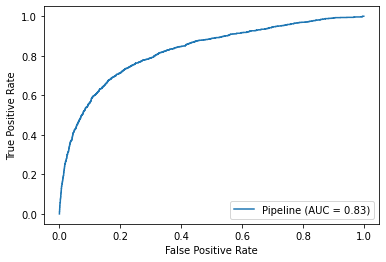

In [391]:
plot_roc_curve(pipeline, X_test, y_test)

In [435]:
# https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb


param_grid = [
    {
        #"preprocesser__num_transform__imputer__strategy": ["mean", "median"],
        "classifier": [LogisticRegression()], 
        'classifier__C': [0.1, 1.0, 10.0, 50.0, 100.0],
        'classifier__max_iter': [100, 1000, 10000], 
        'classifier__multi_class': ['auto', 'ovr', 'multinomial'], 
        'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'], 
        'classifier__solver': ['lbfgs, ‘liblinear', 'sag', 'saga'],
    }, {
        "classifier": [DecisionTreeClassifier()], 
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random'], 
        'classifier__max_depth': [3, 6, 10, 12, 14]}, 
        {
    'classifier': [KNeighborsClassifier()],
    'classifier_n_neighbors': [1, 2, 3, 5, 8, 10, 15], 
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': [10, 15, 20, 30, 50, 75]
    'classifier__weights': ['uniform', 'distance'], 
    'classifier_max_iter': [100, 100, 1000]
    },

{
    'classifier': [LinearSVC()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__loss': ['hinge', 'squared_hinge'], 
    'classifier__C': [0.1, 1.0, 10.0, 50.0, 100.0],
    'classifier__random_state': 42, 
    'classifier_max_iter': [100, 100, 1000]
}
        ]

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 18.2min


KeyboardInterrupt: 

In [438]:
{
    'classifier': [KNeighborsClassifier()],
    'classifier_n_neighbors': [1, 2, 3, 5, 8, 10, 15], 
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': [10, 15, 20, 30, 50, 75]
    'classifier__weights': ['uniform', 'distance'], 
    'classifier_max_iter': [100, 100, 1000]
    },

{
    'classifier': [LinearSVC()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__loss': ['hinge', 'squared_hinge'], 
    'classifier__C': [0.1, 1.0, 10.0, 50.0, 100.0],
    'classifier__random_state': 42, 
    'classifier_max_iter': [100, 100, 1000]
}

{'classifier': [LinearSVC()],
 'classifier__penalty': ['l1', 'l2'],
 'classifier__loss': ['hinge', 'squared_hinge'],
 'classifier__C': [0.1, 1.0, 10.0, 50.0, 100.0],
 'classifier__random_state': 42,
 'classifier_max_iter': [100, 100, 1000]}

In [392]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [393]:
roc_auc_score(y_true, y_pred)


0.68027678753085

In [394]:
output = cross_validate(clf, X_train, y_train, cv=3)
print(f"Average ROC-AUC: {output['test_score'].mean()} +/- {output['test_score'].std()}")

Average ROC-AUC: 0.7753370232999246 +/- 0.0045428822567582725


In [395]:
output

#plot_roc_curve(clf, X_train, y_train)

{'fit_time': array([0.21884298, 0.11218095, 0.10866022]),
 'score_time': array([0.01824403, 0.01372004, 0.01286507]),
 'test_score': array([0.76950726, 0.78059009, 0.77591372])}

In [396]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7825370675453048

In [397]:
clf.score(X_test, y_test)

0.7825370675453048

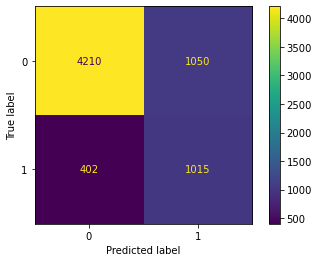

In [398]:

plot_confusion_matrix(clf, X_test, y_test)

In [372]:
y_pred = clf.predict(X_train)

In [373]:
accuracy_score(y_train,y_pred)



0.7761857214178732

In [374]:
clf.score(X_train, y_train)

0.7761857214178732

In [375]:
clf.score(X_test, y_test)

0.7825370675453048

In [376]:
y_train.shape

(20030,)

In [377]:
y_test.shape

(6677,)

In [378]:
y_pred.shape

(20030,)

In [379]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

ValueError: Found input variables with inconsistent numbers of samples: [6677, 20030]

In [ ]:
coef = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(clf['classifier'].coef_))],axis=1)

In [ ]:
print(coef)

In [ ]:
plot_confusion_matrix(clf, y_test, y_pred)